In [1]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [37]:
import pandas as pd
import numpy as np
iris_data = pd.read_csv("iris.csv")
iris_data.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
149,150,5.9,3.0,5.1,1.8,Iris-virginica
73,74,6.1,2.8,4.7,1.2,Iris-versicolor
139,140,6.9,3.1,5.4,2.1,Iris-virginica
103,104,6.3,2.9,5.6,1.8,Iris-virginica
30,31,4.8,3.1,1.6,0.2,Iris-setosa
125,126,7.2,3.2,6.0,1.8,Iris-virginica
89,90,5.5,2.5,4.0,1.3,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
3,4,4.6,3.1,1.5,0.2,Iris-setosa
57,58,4.9,2.4,3.3,1.0,Iris-versicolor


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [38]:
iris_data.fillna(iris_data.median(), inplace=True)
iris_data.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [39]:
cleanup_nums = {"Species":{"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}}
iris_data.replace(cleanup_nums, inplace=True)
print(iris_data.sample(10))

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
35    36            5.0           3.2            1.2           0.2        0
78    79            6.0           2.9            4.5           1.5        1
8      9            4.4           2.9            1.4           0.2        0
92    93            5.8           2.6            4.0           1.2        1
39    40            5.1           3.4            1.5           0.2        0
13    14            4.3           3.0            1.1           0.1        0
59    60            5.2           2.7            3.9           1.4        1
63    64            6.1           2.9            4.7           1.4        1
31    32            5.4           3.4            1.5           0.4        0
108  109            6.7           2.5            5.8           1.8        2


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [40]:
iris_data[iris_data.columns[:]].corr()['Species'][:]

Id               0.942830
SepalLengthCm    0.782561
SepalWidthCm    -0.419446
PetalLengthCm    0.949043
PetalWidthCm     0.956464
Species          1.000000
Name: Species, dtype: float64

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [41]:
variance = iris_data[iris_data.columns[:]].var()
print(variance)
iris_data.drop(labels = ["Id"], axis = 1, inplace=True)

Id               1887.500000
SepalLengthCm       0.685694
SepalWidthCm        0.188004
PetalLengthCm       3.113179
PetalWidthCm        0.582414
Species             0.671141
dtype: float64


## Question 6

*Plot the scatter matrix for all the variables.*

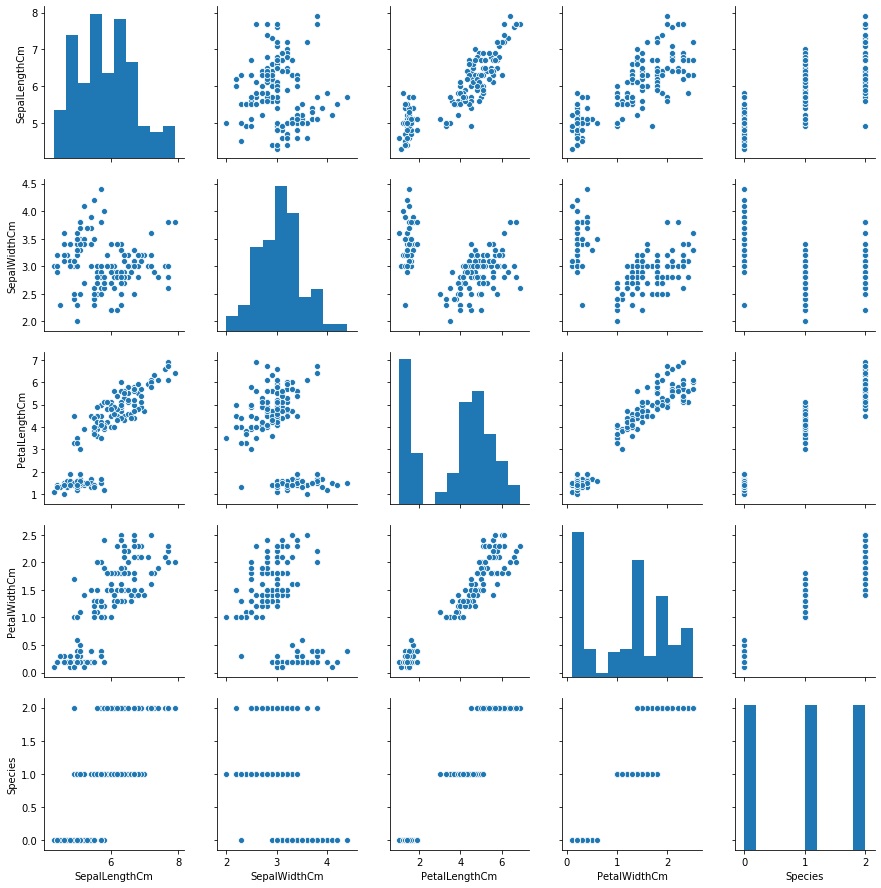

In [75]:
import seaborn as sns
sns.pairplot(iris_data)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_data.iloc[:,0:4], iris_data['Species'], test_size=0.2)
print('Train Data',X_train.shape,y_train.shape)
print('Test Data',X_test.shape,y_test.shape)
X_train.head()

Train Data (120, 4) (120,)
Test Data (30, 4) (30,)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
105,7.6,3.0,6.6,2.1
2,4.7,3.2,1.3,0.2
62,6.0,2.2,4.0,1.0
72,6.3,2.5,4.9,1.5
118,7.7,2.6,6.9,2.3


## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

NNH3 = KNeighborsClassifier(n_neighbors = 3)
NNH3.fit(X_train, y_train)
y_predict3 = NNH3.predict(X_test)
acr3 = accuracy_score(y_test,y_predict3)
print("Accuracy of the model with K = 3,",acr3)

NNH5 = KNeighborsClassifier(n_neighbors = 5)
NNH5.fit(X_train, y_train)
y_predict5 = NNH5.predict(X_test)
acr5 = accuracy_score(y_test,y_predict5)
print("Accuracy of the model with K = 5,",acr5)

NNH9 = KNeighborsClassifier(n_neighbors = 9)
NNH9.fit(X_train, y_train)
y_predict9 = NNH9.predict(X_test)
acr9 = accuracy_score(y_test,y_predict9)
print("Accuracy of the model with K = 9,",acr9)

Accuracy of the model with K = 3, 1.0
Accuracy of the model with K = 5, 0.9666666666666667
Accuracy of the model with K = 9, 1.0


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [45]:
myList = np.arange(1,19,2)
cv_scores = []
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
MSE = [1 - x for x in cv_scores]
optimal_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 13


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

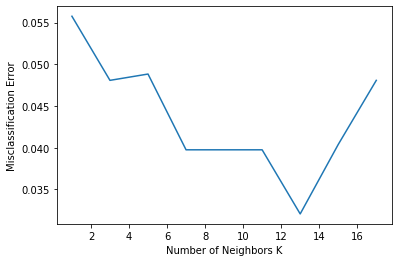

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(myList, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

# Naive Bayes with Iris Data

In [47]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [50]:
X = iris_data.iloc[:, :-1].values
y = iris_data.iloc[:, -1].values

In [51]:
#Check the dataset
print(y)
print(X)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

In [52]:
print(iris_data.groupby('Species').size())

Species
0    50
1    50
2    50
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e1ab940>]],
      dtype=object)

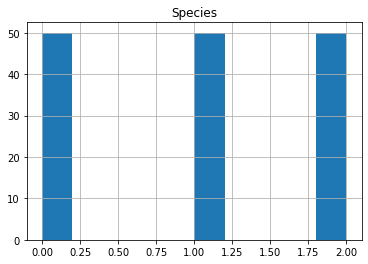

In [53]:
iris_data.hist(column='Species')

In [17]:
#Drop Id variable from data

### Question 12 
Find Correlation among all variables and give your insights 

In [18]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954   
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544   
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757   
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000   
Species             0.782561     -0.419446       0.949043      0.956464   

                Species  
SepalLengthCm  0.782561  
SepalWidthCm  -0.419446  
PetalLengthCm  0.949043  
PetalWidthCm   0.956464  
Species        1.000000  


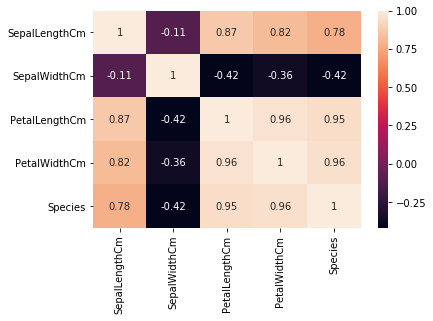

In [74]:
corr = iris_data.corr()
print(corr)
sns.heatmap(corr,annot=True)

INSIGHT : Maximum corelation is between petal Length and Petal width.

### Split data in Training and test set in 80:20.

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
print('Train Data',X_train.shape,y_train.shape)
print('Test Data',X_test.shape,y_test.shape)

Train Data (120, 4) (120,)
Test Data (30, 4) (30,)


### Question 13 
Do Feature Scaling 

In [21]:
# Use StandardScaler or similar methods

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Question 14 
Train and Fit NaiveBayes Model

In [57]:
#Fit the model
clf = GaussianNB()
clf.fit(X_train_std, y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [58]:
#Predict
prediction = clf.predict(X_test_std)
print(prediction)

[1 1 0 1 2 2 0 2 1 2 1 0 0 0 2 1 0 1 2 1 2 0 1 1 1 1 1 2 2 0]


### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [59]:
# show Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,prediction)

print("Confustion Matrix :\n ",conf_matrix)

Confustion Matrix :
  [[ 8  0  0]
 [ 0 11  1]
 [ 0  2  8]]


In [60]:
# show accuracy
from sklearn import metrics
print("Accuracy of the Model:",metrics.accuracy_score(y_test,prediction))

Accuracy of the Model: 0.9


In [27]:
#Show precision and Recall metrics

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.85      0.92      0.88        12
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



# For Practice  - Optional

All the questions from 16 to 20 are for practice.

# Using SVM with Diebetes Dataset

In [29]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 16 
Read the input file 'Diabetes.csv' using Pandas and check it's column names.

Check dimension of dataset.

Check distribution of dependent variable, Outcome and plot it.


In [30]:
# Eye ball the imported dataset

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [31]:
# Check data types and info of dataset

# Question 17 
Check data distribution using summary statistics and provide your findings.

Do correlation analysis and bivariate viualization with Insights


# Question 18 
Do train and test split. 
Optionally - You can do with stratify sampling(optional) on Outcome variable to maintain the distribution of dependent variable

# Question 19 
Train Support Vector Machine Model(1 Marks)

In [32]:
# use from sklearn.svm import SVC

In [33]:
# your insights

# Question 20
Scale the data points using MinMaxScaler

Fit SVM Model on Scale data and give your observation

#we can try increasing either C or gamma to fit a more complex model.

# Optional Question - 
Try improving the model accuracy using C=1000 (1 Marks)

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [34]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [35]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [36]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

NameError: name 'SVC' is not defined

In [ ]:
gs.fit(X_train_scaled, y_train) 

In [ ]:
gs.best_estimator_

In [ ]:
gs.best_score_ 